In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from tqdm import tqdm
import pickle
%matplotlib inline
plt.ioff()

In [2]:
avgs = [1,2,4,8,16,32,64,128]
recs = []
for f in tqdm(glob.glob('current_test/fi_and_drives_*')):
    loss, batch_size = map(int,f.split('.')[0].split('_')[-2:])
    a = np.load(f)
    random_drives, k, b, k_flat, k_onlydiag, opt_drives, ko, bo, ko_flat, ko_onlydiag = [a[_] for _ in a]
    with open('current_test/hists_%s_%s.weights'%(loss,batch_size),'rb') as pf:
        p = pickle.load(pf)
    loss = ['trace','determinant','trace inverse','minimal eigenvalue'][loss]
    ran,opt = p
    for i, a in enumerate(avgs):
        r = {k:sum([_[k] for _ in ran[i]],[]) for k in ran[i][0]}
        o = {k:sum([_[k] for _ in opt[i]],[]) for k in opt[i][0]}
        recs.append({'optimized':False,
                     'info_loss':loss,
                     'batch_size':batch_size,
                     'drives':random_drives,
                     'k':k,
                     'b':b,
                     'k_flat':k_flat,
                     'k_onlydiag':k_onlydiag,
                     'S':a,
                     **r})
        recs.append({'optimized':True,
                     'info_loss':loss,
                     'batch_size':batch_size,
                     'drives':opt_drives,
                     'k':ko,
                     'b':bo,
                     'k_flat':ko_flat,
                     'k_onlydiag':ko_onlydiag,
                     'S':a,
                     **o})

100%|██████████| 44/44 [00:01<00:00, 26.93it/s]


In [3]:
df = pd.DataFrame.from_records(recs)

In [6]:
df['best_val_loss'] = df.val_loss.apply(lambda _:_[-1])

In [90]:
df.head()

,S,b,batch_size,binary_crossentropy,drives,info_loss,k,k_flat,k_onlydiag,loss,mean_absolute_error,mean_squared_error,optimized,val_binary_crossentropy,val_loss,val_mean_absolute_error,val_mean_squared_error
0,1,"[[0.3796823498764106, 0.02722575331725527, 0.0...",125,"[0.26862738466115016, 0.24646651243168557, 0.2...","[[1.6243453636632417, -0.6117564136500754, -0....",trace,[[[[ 0.33775266 0.0479439 0.05024927 0.013...,"[[0.3377526642282781, 0.04794390018663484, 0.0...","[[0.3377526642282781, -0.00863047336126683, 0....","[0.08573547491261105, 0.07851392839406497, 0.0...","[0.16796909428946613, 0.15923872824058058, 0.1...","[0.08029418710913251, 0.0722175711534332, 0.06...",False,"[0.3028589352293946, 0.31495087955775625, 0.32...","[0.008792834520336657, 0.01218317040045233, 0....","[0.0346283706528735, 0.04850205394403772, 0.05...","[0.0028654117533934197, 0.005541623909869364, ..."
1,1,"[[0.36424905956092557, 0.03319008132257446, 0....",125,"[0.18062929670373815, 0.16405760494724025, 0.1...","[[0.9206764484835724, 0.270850808914643, -0.31...",trace,[[[[ 0.32103533 -0.00416349 0.02545137 -0.060...,"[[0.3210353304439495, -0.004163493502670445, 0...","[[0.3210353304439495, 0.0003181598615893431, 0...","[0.0585109378668198, 0.05293166643174049, 0.05...","[0.12418127328628796, 0.12036781397705847, 0.1...","[0.052058717573300994, 0.045817063784764175, 0...",True,"[0.327355447306306, 0.3331576045176565, 0.3356...","[0.015059163345814062, 0.016522147442408798, 0...","[0.05919926313611673, 0.0637090641040324, 0.06...","[0.008065112481544708, 0.009311975911602013, 0..."
2,2,"[[0.3796823498764106, 0.02722575331725527, 0.0...",125,"[0.25793309714365986, 0.2422075954849003, 0.23...","[[1.6243453636632417, -0.6117564136500754, -0....",trace,[[[[ 0.33775266 0.0479439 0.05024927 0.013...,"[[0.3377526642282781, 0.04794390018663484, 0.0...","[[0.3377526642282781, -0.00863047336126683, 0....","[0.03763830448972427, 0.033421923881724325, 0....","[0.11623018942606983, 0.10777277977306207, 0.1...","[0.031214138497183266, 0.025961631325698887, 0...",False,"[0.3298694198947313, 0.35107332048261375, 0.35...","[0.01591757152549417, 0.02104376055490883, 0.0...","[0.06251298849391101, 0.07749251515564798, 0.0...","[0.008797279702926477, 0.013407938680049329, 0..."
3,2,"[[0.36424905956092557, 0.03319008132257446, 0....",125,"[0.20976476427967916, 0.19976852582810334, 0.1...","[[0.9206764484835724, 0.270850808914643, -0.31...",trace,[[[[ 0.32103533 -0.00416349 0.02545137 -0.060...,"[[0.3210353304439495, -0.004163493502670445, 0...","[[0.3210353304439495, 0.0003181598615893431, 0...","[0.03200017887769488, 0.028525429695759948, 0....","[0.09492724316119598, 0.09001294488039369, 0.0...","[0.025685091571263096, 0.02172864099312738, 0....",True,"[0.3213381120591023, 0.3338949791207468, 0.343...","[0.01400190806623284, 0.017072390608576998, 0....","[0.054941929334181364, 0.0650890233419009, 0.0...","[0.007337583468955557, 0.010172682275147968, 0..."
4,4,"[[0.3796823498764106, 0.02722575331725527, 0.0...",125,"[0.2746872130822705, 0.27125528707790686, 0.27...","[[1.6243453636632417, -0.6117564136500754, -0....",trace,[[[[ 0.33775266 0.0479439 0.05024927 0.013...,"[[0.3377526642282781, 0.04794390018663484, 0.0...","[[0.3377526642282781, -0.00863047336126683, 0....","[0.020678995475220875, 0.01936076803731596, 0....","[0.08534322431665982, 0.08075895216929285, 0.0...","[0.014743869748947602, 0.01313415928240651, 0....",False,"[0.31225263237473644, 0.31603364606194634, 0.3...","[0.011258430349188782, 0.012205766842230004, 0...","[0.04618386388657479, 0.05005877095071103, 0.0...","[0.0050809355937581555, 0.00594587918088944, 0..."


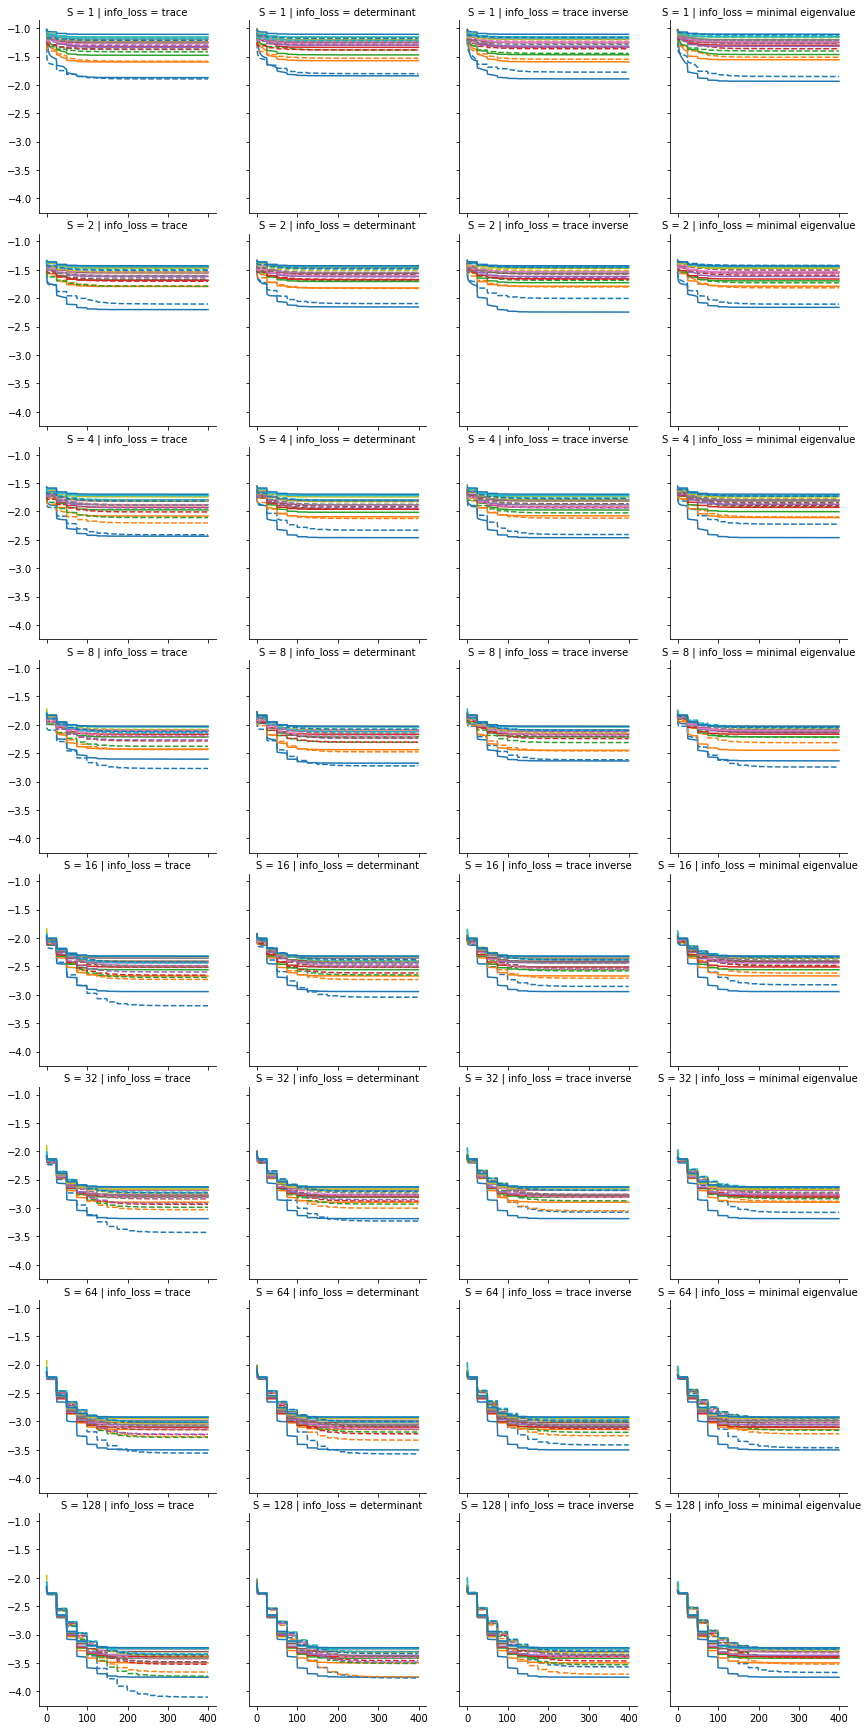

In [119]:
plt.close('all')
fg = sns.FacetGrid(df, col='info_loss', hue='batch_size', row='S')
for (r,c,h), d in  fg.facet_data():
    a = fg.facet_axis(r,c)
    color = sns.color_palette()[h%len(sns.color_palette())]
    plt.plot(np.log10(d.loss[d.optimized==False].get_values()[0]),color=color)
    plt.plot(np.log10(d.loss[d.optimized==True].get_values()[0]),color=color,linestyle='dashed')
fg.set_titles()
fg.fig

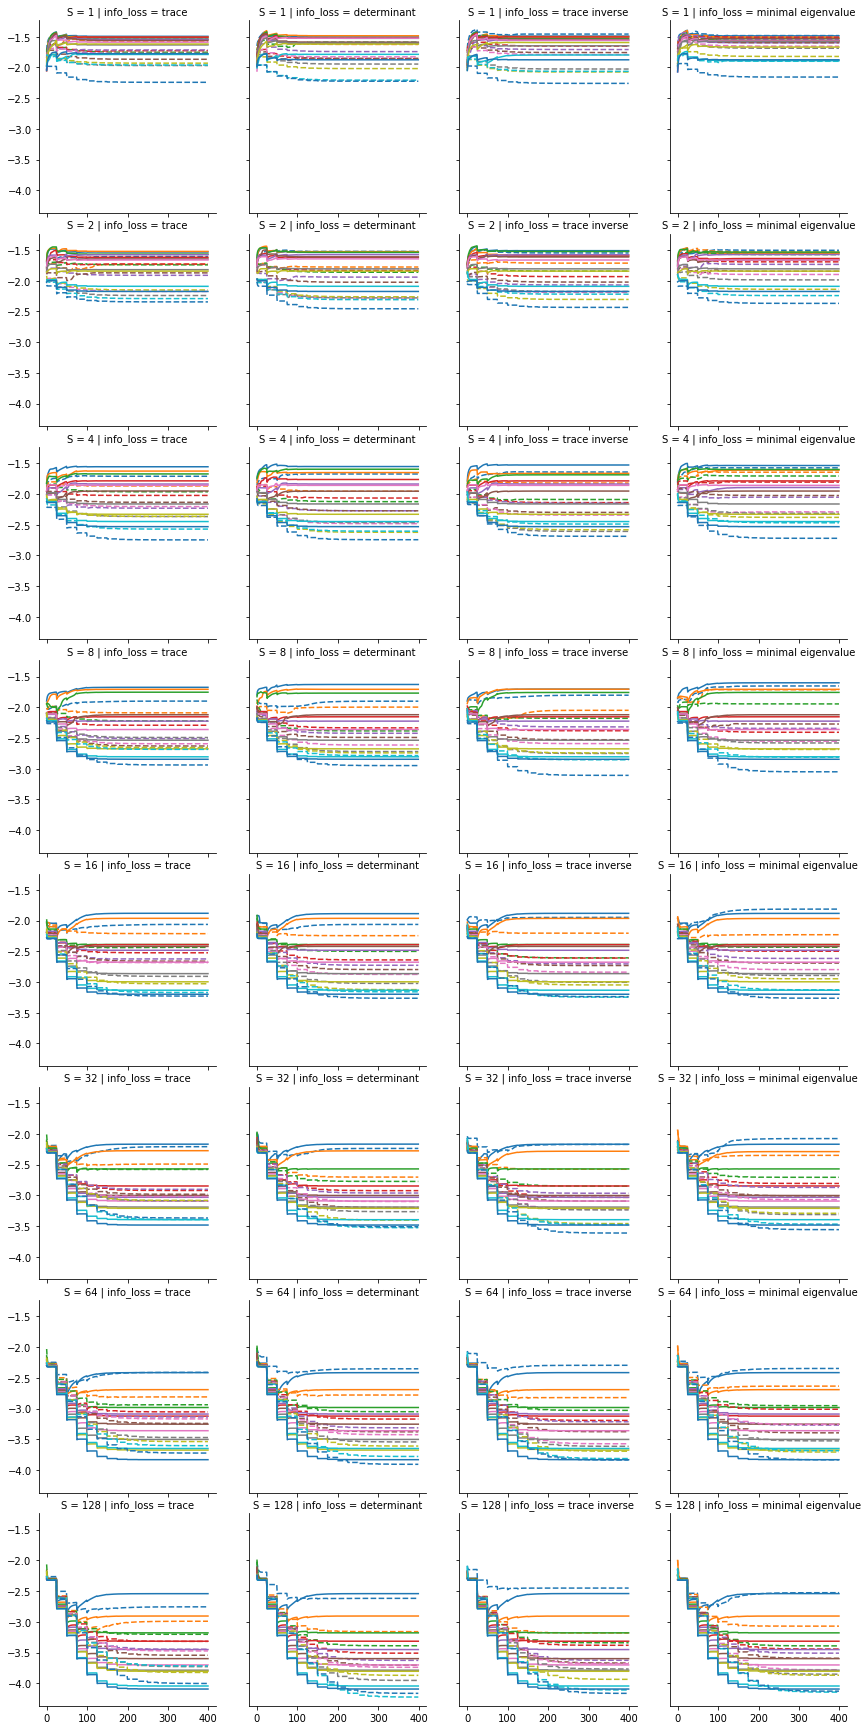

In [120]:
plt.close('all')
fg = sns.FacetGrid(df, col='info_loss', hue='batch_size', row='S')
for (r,c,h), d in  fg.facet_data():
    a = fg.facet_axis(r,c)
    color = sns.color_palette()[h%len(sns.color_palette())]
    plt.plot(np.log10(d.val_loss[d.optimized==False].get_values()[0]),color=color)
    plt.plot(np.log10(d.val_loss[d.optimized==True].get_values()[0]),color=color,linestyle='dashed')
fg.set_titles()
fg.fig

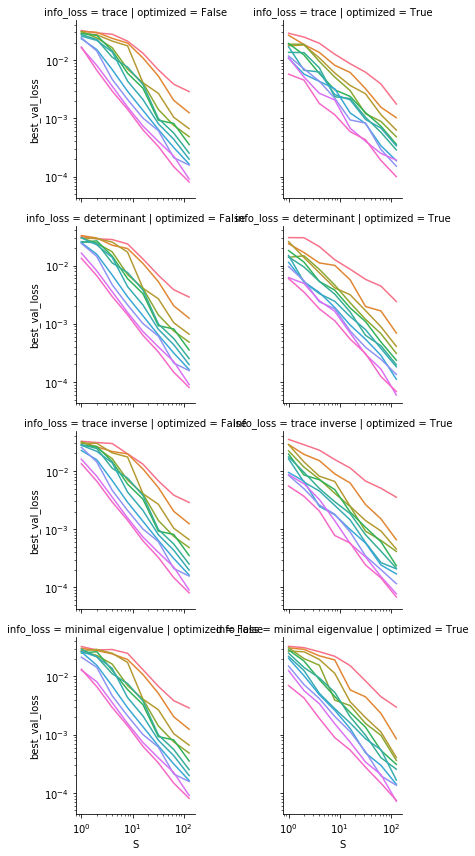

In [9]:
plt.close('all')
fg = sns.FacetGrid(df, col='optimized', row='info_loss', hue='batch_size')
fg.map(plt.loglog,'S','best_val_loss')

In [12]:
d.best_val_loss[d.optimized==False].get_values()

array([0.03206951, 0.02931507, 0.02774429, 0.0211276 , 0.01312659,
       0.00678763, 0.003846  , 0.00287327])

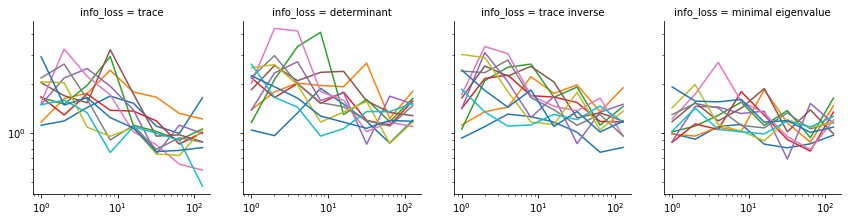

In [15]:
plt.close('all')
fg = sns.FacetGrid(df, col='info_loss', hue='batch_size')
for (r,c,h), d in  fg.facet_data():
    a = fg.facet_axis(r,c)
    color = sns.color_palette()[h%len(sns.color_palette())]
    ran_loss = d.best_val_loss[d.optimized==False].get_values()
    opt_loss = d.best_val_loss[d.optimized==True ].get_values()
    s = avgs
#    plt.loglog(s,ran_loss,color=color)
#    plt.loglog(s,opt_loss,color=color,linestyle='dashed')
    plt.loglog(s,ran_loss/opt_loss,color=color)
fg.set_titles()

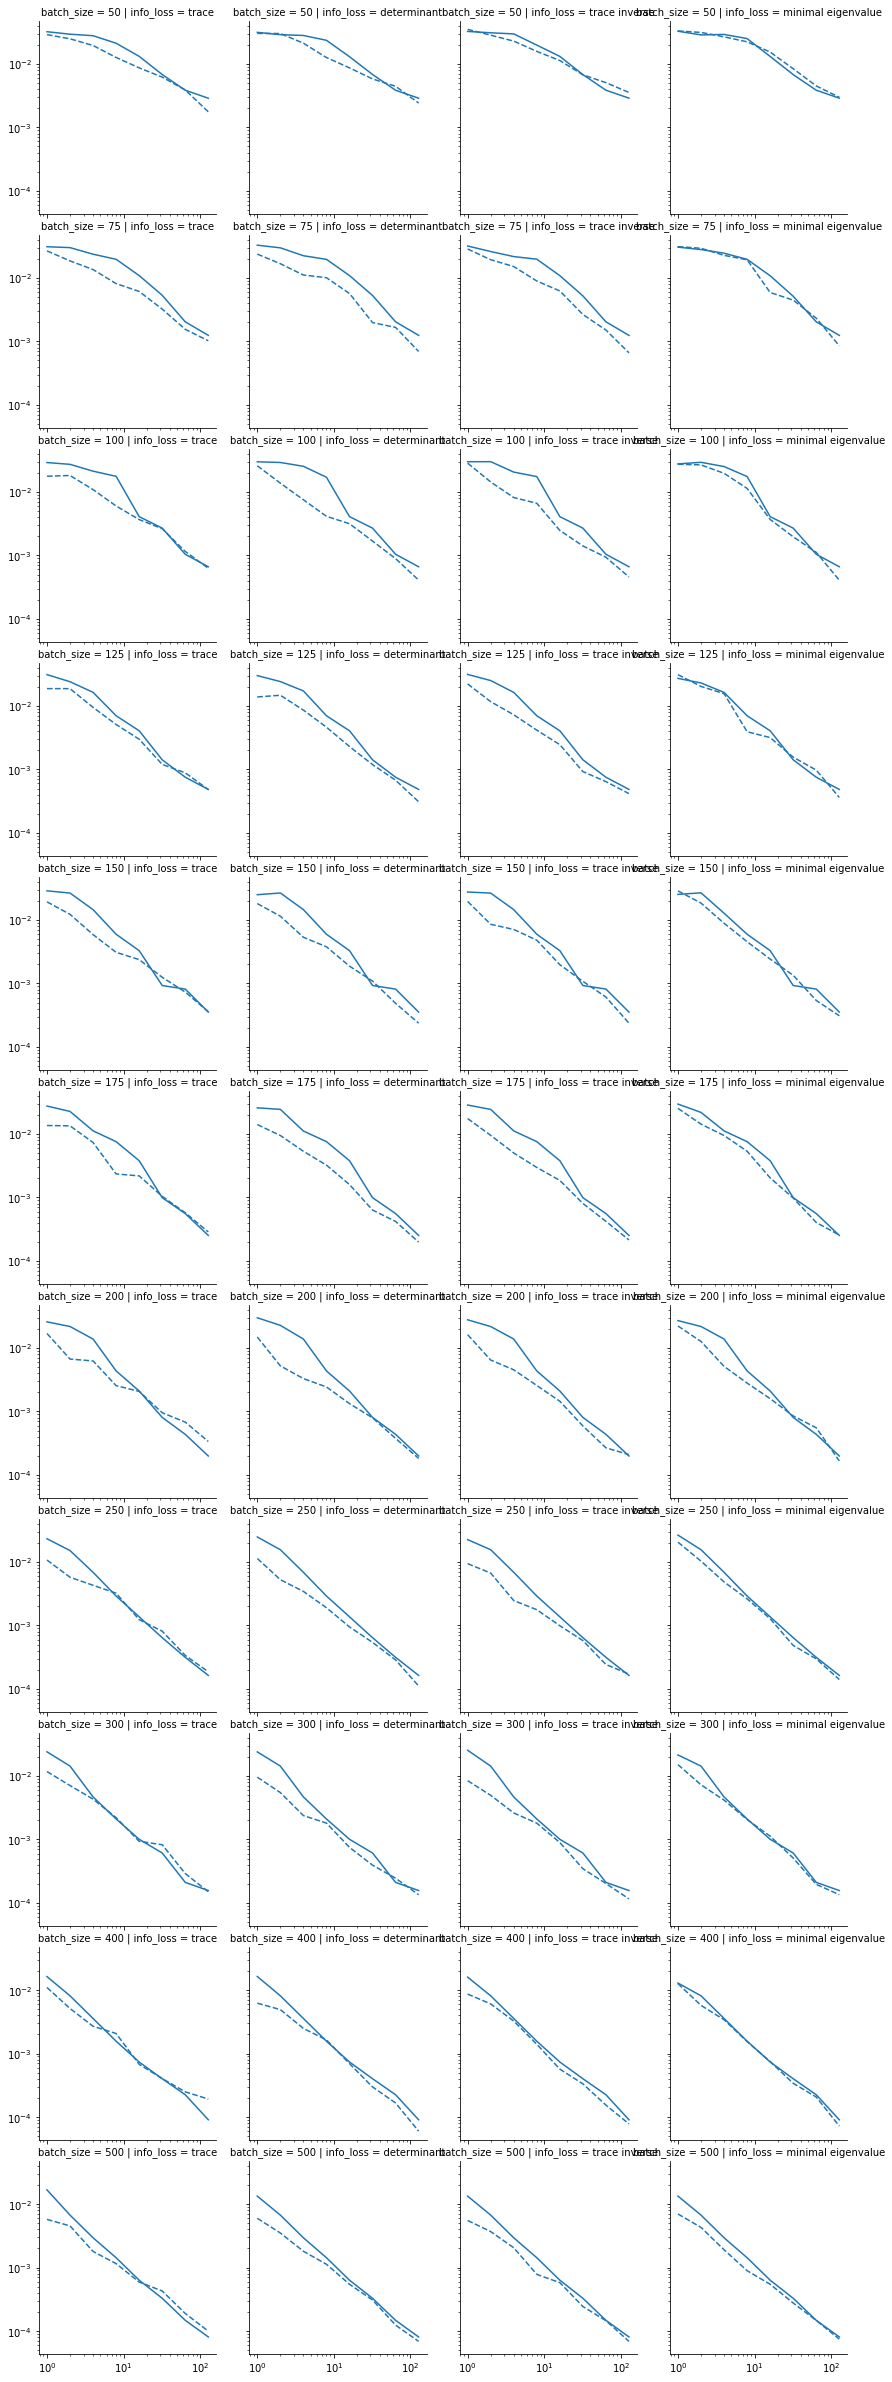

In [16]:
plt.close('all')
fg = sns.FacetGrid(df, col='info_loss', row='batch_size')
for (r,c,h), d in  fg.facet_data():
    a = fg.facet_axis(r,c)
    color = sns.color_palette()[h%len(sns.color_palette())]
    ran_loss = d.best_val_loss[d.optimized==False].get_values()
    opt_loss = d.best_val_loss[d.optimized==True ].get_values()
    s = avgs
    plt.loglog(s,ran_loss,color=color)
    plt.loglog(s,opt_loss,color=color,linestyle='dashed')
fg.set_titles()